# Read the content from the unzipped files

In [59]:
import idx2numpy
import numpy as np

# train set
trainfile = 'train-images-idx3-ubyte'
trainfilelabels = 'train-labels-idx1-ubyte'

# test set
testfile = 't10k-images-idx3-ubyte'
testfilelabels = 't10k-labels-idx1-ubyte'

trainimages = idx2numpy.convert_from_file(trainfile)
trainimageslabels = idx2numpy.convert_from_file(trainfilelabels)

testimages = idx2numpy.convert_from_file(testfile)
testimageslabels = idx2numpy.convert_from_file(testfilelabels)

In [60]:
trainimages.shape

(60000, 28, 28)

In [61]:
testimages.shape

(10000, 28, 28)

In [62]:
trainimageslabels.shape

(60000,)

In [63]:
testimageslabels.shape

(10000,)

In [64]:
x_train = trainimages
y_train = trainimageslabels
x_test = testimages
y_test = testimageslabels

2


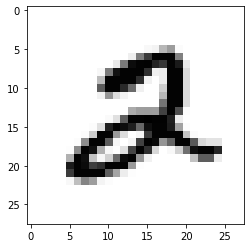

In [65]:
# let's try to show one image to prove it is real image
import matplotlib.pyplot as plt

# Select anything up to 60,000
image_index = 5 

print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [66]:
x_train.shape

(60000, 28, 28)

In [67]:
# Reshape the arrays for the Keras CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [68]:
x_train.shape

(60000, 28, 28, 1)

In [69]:
# we would need to scale the feature to something between 0.01 to 0.99
# to help the NN better generalize and learn the weights

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [70]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [71]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [72]:
x_train += 0.01
x_train[0]

array([[[0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ]],

       [[0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        [0.01      ],
        

In [73]:
# TensorFlow with Keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the 2D arrays for fully connected layers
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [54]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.2069 - accuracy: 0.9383
Epoch 2/10
60000/60000 [==============================] - 24s 407us/step - loss: 0.0842 - accuracy: 0.9738
Epoch 3/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.0577 - accuracy: 0.9821
Epoch 4/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0432 - accuracy: 0.9857
Epoch 5/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0340 - accuracy: 0.9880
Epoch 6/10
60000/60000 [==============================] - 25s 410us/step - loss: 0.0280 - accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0255 - accuracy: 0.9917
Epoch 8/10
60000/60000 [==============================] - 25s 419us/step - loss: 0.0219 - accuracy: 0.9927
Epoch 9/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.0184 - accuracy: 0.9940
Epoch 10/10
60000/60000 [============

In [55]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 91us/step


[0.07328493451551804, 0.9843000173568726]

# Predict

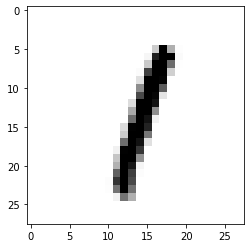

In [57]:
# set image index to show up to 60000
idx = 5
plt.imshow(x_test[idx].reshape(28, 28),cmap='Greys')

In [58]:
# make sure that we use th
predict = model.predict(x_test[imageIndex].reshape(1, 28, 28, 1))
print(predict.argmax())

1
